### Isit Pokharel 
#### NLP Project to analyze subtitle of movie "Ides of March"
##### Concepts covered: Text cleaning & Processing, Part of Speech Tagging, KPE (Key Phrase Extraction), NER (Named Entity Recognition), Knowledge Graphs

## Proposed Text


The objective of this project is to leverage Natural Language Processing (NLP) techniques to conduct an analysis of the movie's subtitles. "Ides of March" is a political drama featuring George Clooney and Ryan Gosling, with a central focus on a political campaign. In the storyline, George Clooney's character runs for the presidency of the United States, while Ryan Gosling's character plays a crucial role as a campaign worker. The analysis will aim to extract meaningful insights from the text data.








In [42]:
import pysrt
import pandas as pd
import re
import spacy

#%%
import subprocess
#%%
print(subprocess.getoutput("python -m spacy download en_core_web_sm"))
nlp = spacy.load('en_core_web_sm')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 35.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [43]:
subs = pysrt.open("ides_of_march.srt", encoding="latin-1")

DF = pd.DataFrame([
  {
    "Text": sub.text,
    "Start": sub.start.seconds,
    "End": sub.end.seconds
} for sub in subs])

DF.head()

,Text,Start,End
0,I'm not a Christian. I'm not an atheist.,52,55
1,I'm not Jewish. I'm not Muslim.,56,59
2,My religion and what I believe in,59,3
3,is called the Constitution\nof the United Stat...,3,7
4,- Hang on.\n- Did you get that?,26,28


##### Fix Errors. 
 
Looks like there are some suspsicious/impure characters like #, <, >, &, -, \ etc. I am going to clean all that data below. 

In [17]:
# Regular expression pattern to identify suspicious characters
RE_SUSPICIOUS = re.compile(r'[&#<>{}\-\[\]\\]')

# Function to calculate the proportion of suspicious characters in a text
def impurity(text, min_len=0):
    """Returns the share of suspicious characters in a text"""
    if text is None or len(text) < min_len:
        return 0
    else:
        # Calculating the impurity score
        impurity_score = (len(RE_SUSPICIOUS.findall(text)) / len(text)) * 100
        return impurity_score

# Applying the impurity function to the 'Text' column of DataFrame DF
DF['score'] = DF['Text'].apply(impurity)

# Sorting the DataFrame based on the 'score' column in descending order and displaying the top 10 entries
DF.sort_values(['score'], ascending=[False]).head(10)

,Text,Start,End,score
170,# While I #,59,2,18.181818
215,- Win-win.\n- Okay.,6,9,16.666667
219,- Hey.\n- Hey.,26,27,15.384615
169,# 'Scuse me #,55,59,15.384615
171,# Disappear #,2,4,15.384615
1062,- Who?\n- Paul.,28,30,14.285714
493,- Twenty.\n- Yep.,13,15,12.500000
556,- I was?\n- Yeah.,23,25,12.500000
780,- Molly?\n- Hello?,24,26,11.764706
1074,"- Yeah.\n- Oh, no.",59,1,11.764706


In [18]:


import nltk

# Importing textacy for text preprocessing
import textacy.preprocessing as tprep
#nltk.download('punkt')

# Defining a function for text normalization
def normalize(text):
    # Applying various cleaning techniques
    text = tprep.normalize.hyphenated_words(text)
    text = tprep.normalize.quotation_marks(text)
    text = tprep.normalize.unicode(text)
    text = tprep.remove.accents(text)
    text = tprep.replace.phone_numbers(text)
    text = tprep.replace.urls(text)
    text = tprep.replace.emails(text)
    text = tprep.replace.user_handles(text)
    text = tprep.replace.emojis(text)
    # Stripping any extra spaces
    text = text.strip()
    return text

# Applying the normalization function to the 'Text' column of DataFrame DF
DF['clean'] = DF['Text'].apply(normalize)

In [19]:
# Removing all the previously defined suspisious characters using the regex function. 
DF['clean_text'] = DF['clean'].apply(lambda x: re.sub(RE_SUSPICIOUS, ' ', x))
DF.sort_values(['score'], ascending = [False]).head(10)

,Text,Start,End,score,clean,clean_text
170,# While I #,59,2,18.181818,# While I #,While I
215,- Win-win.\n- Okay.,6,9,16.666667,- Win-win.\n- Okay.,Win win.\n Okay.
219,- Hey.\n- Hey.,26,27,15.384615,- Hey.\n- Hey.,Hey.\n Hey.
169,# 'Scuse me #,55,59,15.384615,# 'Scuse me #,'Scuse me
171,# Disappear #,2,4,15.384615,# Disappear #,Disappear
1062,- Who?\n- Paul.,28,30,14.285714,- Who?\n- Paul.,Who?\n Paul.
493,- Twenty.\n- Yep.,13,15,12.500000,- Twenty.\n- Yep.,Twenty.\n Yep.
556,- I was?\n- Yeah.,23,25,12.500000,- I was?\n- Yeah.,I was?\n Yeah.
780,- Molly?\n- Hello?,24,26,11.764706,- Molly?\n- Hello?,Molly?\n Hello?
1074,"- Yeah.\n- Oh, no.",59,1,11.764706,"- Yeah.\n- Oh, no.","Yeah.\n Oh, no."


In [20]:
# Reexamining impurity after removing suspicious characters
DF['clean_text'].apply(impurity).sort_values(ascending=[False]).head(10)

0 0.0
916 0.0
924 0.0
923 0.0
922 0.0
921 0.0
920 0.0
919 0.0
918 0.0
917 0.0
Name: clean_text, dtype: float64

##### Write a paragraph explaining the process of cleaning data for a your NLP pipeline. You should explain the errors you found in the dataset and how you fixed them. Why did you think these things were important to fix for this project?

As we can see from the above result, impurity in text is cleaned now. 

First, I stored the subtitle data in a pandas dataframe. After doing so, i manually checked the text data to see if there are any impure characters in the dataset that might affect the NLP analysis later on and found that there are some characters like  #, <, >, &, -, \ and removed them using regex. Then i used textacy apply a series of text normalizations, including hyphenated words, quotation marks, Unicode characters, accent removal, replacement of phone numbers, URLs, emails, user handles, and emojis, to preprocess and standardize the input text.
                                              

#### Part of Speech Tagging

- Tag your data with spacy’s part of speech tagger.
- Convert this data into a Pandas DataFrame.
- Use the dataframe to calculate the most common parts of speech.
- What is the most common part of speech?
- Do you see words that are multiple parts of speech?
- What can you learn about the text from examining the most common nouns and verbs?

In [21]:
# Extracting spaCy tags for words in the 'clean_text' column
spacy_tags = []

# Iterating through each row in the 'clean_text' column
for row in DF['clean_text'].to_list():
    # Tokenizing the text using spaCy
    for word in nlp(row):
        # Excluding tokens that are only spaces
        if not word.is_space:
            # Appending word, specific tag, and universal tag to the list
            spacy_tags.append((str(word), str(word.tag_), str(word.pos_)))

# Creating a DataFrame DF_tags from the spaCy tags list
DF_tags = pd.DataFrame(spacy_tags, columns=['word', 'specific', 'universal'])
DF_tags.head()

,word,specific,universal
0,I,PRP,PRON
1,'m,VBP,AUX
2,not,RB,PART
3,a,DT,DET
4,Christian,NNP,PROPN


In [8]:
# Counting the most common part of speech (universal) in the DataFrame DF_tags
DF_tags['universal'].value_counts()

PRON 2411
PUNCT 2404
VERB 1842
NOUN 1418
AUX 1136
ADP 856
DET 807
PROPN 639
PART 572
ADJ 522
ADV 500
SCONJ 312
CCONJ 278
INTJ 246
NUM 114
Name: universal, dtype: int64


The analysis of the DF_tags DataFrame reveals the distribution of universal parts of speech in the processed text. Here's a summary of the top 5 most common universal parts of speech based on the provided result:

Pronoun (PRON): Pronouns are the most frequently occurring universal part of speech, with 2411 occurrences in the text. Pronouns typically replace or refer to nouns.

Punctuation (PUNCT): Punctuation marks come second in frequency, with 2404 occurrences. Punctuation plays a crucial role in structuring sentences and conveying meaning.

Verb (VERB): Verbs are the third most common universal part of speech, appearing 1842 times. Verbs denote actions, processes, or states.

Noun (NOUN): Nouns are the fourth most common, with 1418 occurrences. Nouns represent people, places, things, or ideas.

Auxiliary Verb (AUX): Auxiliary verbs rank fifth, appearing 1136 times. Auxiliary verbs, such as "is," "have," or "will," accompany main verbs to convey tense, mood, or aspect.

In summary, the most prevalent universal parts of speech in the analyzed text are pronouns, punctuation marks, verbs, nouns, and auxiliary verbs. This information provides insights into the composition of the text and the distribution of different linguistic elements.

In [9]:
# Analyzing words that have multiple parts of speech
pd.crosstab(DF_tags['word'], DF_tags['universal'])

universal,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PART,PRON,PROPN,PUNCT,SCONJ,VERB
word,,,,,,,,,,,,,,,
!,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0
"""",0,0,0,0,0,0,0,0,0,0,0,0,50,0,0
',0,0,0,0,0,0,0,0,0,8,0,0,2,0,0
'cause,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
'd,0,0,0,18,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
you,0,0,0,0,0,0,0,0,0,0,379,0,0,0,0
young,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0
your,0,0,0,0,0,0,0,0,0,0,58,0,0,0,0


In [22]:
# Counting the occurrences of each word and sorting to find the top 10 most frequent words
word_counts = DF_tags.groupby('word')['universal'].count().reset_index()
word_counts.sort_values(by='universal', ascending=False, inplace=True)
top_words = word_counts.head(10)
top_words

,word,universal
11,.,1319
10,",",653
207,I,455
1835,you,379
1655,the,349
46,?,326
8,'s,236
1688,to,236
445,a,226
1065,it,190


The above result shows the top words and their counts, allowing to analyze words that occur most frequently across various parts of speech.

In [23]:
# Filtering for nouns and verbs and finding the most common ones
nouns_verbs_df = DF_tags[(DF_tags['universal'] == 'NOUN') | (DF_tags['universal'] == 'VERB')]

# Finding the most common nouns
most_common_nouns = nouns_verbs_df[nouns_verbs_df['universal'] == 'NOUN']['word'].value_counts().head(10)

# Finding the most common verbs
most_common_verbs = nouns_verbs_df[nouns_verbs_df['universal'] == 'VERB']['word'].value_counts().head(10)

# Displaying the results for most common nouns
print("Most Common Nouns:")
most_common_nouns

Most Common Nouns:


campaign 31
governor 27
guy 18
shit 16
people 15
delegates 14
way 14
story 14
thing 14
years 13
Name: word, dtype: int64

Looks like words like campaign, governer, people, delegates are few of the most common nouns in the text. This makes sense because the move 'ides of march' is about a political campaign where george clonney's character is governer running for president of the united states. 

In [12]:

print("\nMost Common Verbs:")
print(most_common_verbs)


Most Common Verbs:
gon      85
have     69
know     66
do       62
get      51
got      50
think    41
tell     30
go       26
going    26
Name: word, dtype: int64


##### KPE (Key Phrase Extraction)

In this part of the analysis, I'll be

- Using textacy to find the key phrases in your text.

- Using textacy utilities and combine like key phrases.

- Learn about your text by using keyphrase analysis.

In [26]:
import textacy
import networkx as nx
from matplotlib import pyplot as plt
from itertools import chain

# Combining text from the 'clean_text' column
combined_doc = " ".join(DF['clean_text'].to_list())

# Building an English language model for textacy
en = textacy.load_spacy_lang("en_core_web_sm", disable=("parser"))

# Building a processor for textacy using spaCy and processing text
doc = textacy.make_spacy_doc(combined_doc, lang=en)

# Extracting key phrases and their TextRank scores from the subtitles
key_phrases_textrank = textacy.extract.keyterms.textrank(doc)
key_phrases_textrank

[('fucking wild ass day', 0.006236421560264221),
 ('fucking dirty shit', 0.006132777875836812),
 ('fucking thing', 0.005888820115919572),
 ('fucking way', 0.005527081905379186),
 ('fucking story', 0.005505288457375724),
 ('win win situation', 0.005280444147864183),
 ('fucking national security', 0.005144660501200745),
 ('fucking buffalo wing', 0.00513889935422721),
 ('fucking wing nut', 0.005059169070998061),
 ('fucking politic', 0.00482692255360417)]

In [30]:
# Combining like key phrases to reduce redundancy and improve interpretability
# Using textacy's function to aggregate term variants

terms = set([term for term, weight in textacy.extract.keyterms.textrank(doc)])
textacy.extract.utils.aggregate_term_variants(terms)

[{'fucking national security'},
 {'fucking wild ass day'},
 {'fucking buffalo wing'},
 {'fucking dirty shit'},
 {'win win situation'},
 {'fucking wing nut'},
 {'fucking politic'},
 {'fucking thing'},
 {'fucking story'},
 {'fucking way'}]

The keyphrase analysis reveals a mix of strong language and colloquial expressions, including phrases like "fucking national security" and "win-win situation." The presence of "fucking politic" suggests a focus on political matters. The diverse topics covered, from national security to everyday situations, indicate a varied content. Overall, the analysis highlights an expressive tone with references to both formal and informal subjects.

##### NER (Named Entity Recognition)

In this part of the analysis, I'll be
 - Using spacy to extract named entities.
 - Creating a summary of your named entities.
 - Applying Snorkel to your data to show any relationship between names.
 - Finding and exploring relationships, if there are any between entities. 

In [31]:
# Extracting named entities and their types using spaCy
spacy_ner_tagged = [(ent, ent.label_) for ent in nlp(combined_doc).ents]

# Creating a DataFrame DF_tags with named entities and their types
DF_tags = pd.DataFrame(spacy_ner_tagged, columns=['word', 'entity'])
DF_tags.head(5)

,word,entity
0,(Christian),NORP
1,(Jewish),NORP
2,(Muslim),NORP
3,"(the, Constitution)",LAW
4,"(the, United, States, of, America)",GPE


In [32]:
# Summarizing named entity types and their counts in the DataFrame DF_tags
DF_tags['entity'].value_counts()

PERSON 228
GPE 101
ORG 68
DATE 65
CARDINAL 55
NORP 39
TIME 32
ORDINAL 11
FAC 8
PERCENT 4
LAW 2
QUANTITY 2
WORK_OF_ART 2
EVENT 2
LOC 2
MONEY 2
Name: entity, dtype: int64

The most prevalent entities are individuals (PERSON) with 228 occurrences, followed by geopolitical entities (GPE) at 101, and organizations (ORG) at 68. Other identified entities include dates (DATE), cardinal numbers (CARDINAL), nationalities or religious or political groups (NORP), and time expressions (TIME). The list also includes ordinal numbers (ORDINAL), facilities (FAC), percentages (PERCENT), laws (LAW), quantities (QUANTITY), works of art (WORK_OF_ART), events (EVENT), locations (LOC), and monetary expressions (MONEY), each with varying frequencies.

Considering the movie's focus on a political campaign, it is logical that the entities identified by SpaCy's Named Entity Recognition include individuals (PERSON), geopolitical entities (GPE), organizations (ORG), nationalities or religious or political groups (NORP), laws (LAW), events (EVENT), and locations (LOC). These entity types align with the expected elements in a narrative centered around political activities.

In [34]:
# Identifying relationships between names (Persons) using Snorkel
from snorkel.preprocess import preprocessor
from snorkel.types import DataPoint
from snorkel.labeling import labeling_function
from snorkel.labeling import PandasLFApplier
from itertools import combinations

In [35]:
# Processing DataFrame to find every pairwise combination of entities of interest using spaCy
# Define the entity types of interest (e.g., "PERSON")
ent_types = ["PERSON"]

# Empty list to store pairwise combinations
stored_entities = []

# Function to extract entities and their pairwise combinations
def get_entities(x):
    """
    Grabs the names using spaCy's entity labeler
    """
    # Get all the entities in this row
    processed = nlp(x)
    # Get the tokens for each sentence
    tokens = [word.text for word in processed]
    # Get all the entities for the specified types
    temp = [(ent.text, ent.label_) for ent in processed.ents if ent.label_ in ent_types]
    # Proceed only if this row has at least two entities
    if len(temp) > 1:
        # Find all the combinations of pairs
        temp2 = list(combinations(temp, 2))
        # For each pair combination
        for (person1, person2) in temp2:
            # Find the names in person 1
            person1_words = [word.text for word in nlp(person1[0])]
            # Find the token numbers for person 1
            person1_ids = [i for i, val in enumerate(tokens) if val in person1_words]
            # Output in (start, stop) token tuple format
            if len(person1_words) > 1:
                person1_ids2 = tuple(idx for idx in person1_ids)
            else:
                id_1 = [idx for idx in person1_ids]
                person1_ids2 = (id_1[0], id_1[0])

            # Do the same thing with person 2
            person2_words = [word.text for word in nlp(person2[0])]
            person2_ids = [i for i, val in enumerate(tokens) if val in person2_words]
            if len(person2_words) > 1:
                person2_ids2 = tuple(idx for idx in person2_ids)
            else:
                id_2 = [idx for idx in person2_ids]
                person2_ids2 = (id_2[0], id_2[0])

            # Store all this in a list
            stored_entities.append(
                [x,  # Original text
                 tokens,  # Tokens
                 person1[0],  # Person 1 name
                 person2[0],  # Person 2 name
                 person1_ids2,  # Person 1 id token tuple
                 person2_ids2  # Person 2 id token tuple
                 ])

# Apply the get_entities function to the 'clean_text' column
DF['clean_text'].apply(get_entities)

# Create a DataFrame in Snorkel's structure
DF_dev = pd.DataFrame(stored_entities, columns=["sentence", "tokens", "person1", "person2", "person1_word_idx", "person2_word_idx"])
DF_dev[["sentence", "person1", "person2", "tokens"]].head(10)

,sentence,person1,person2,tokens
0,I like Mike! I like Mike!,Mike,Mike,"[I, like, Mike, !, I, like, Mike, !]"
1,Shelly's pre programmed\nyour numbers. Thank y...,Shelly,Shelly,"[Shelly, 's, pre, programmed, \n, your, number..."
2,"Under ""Mary.""\n I know your name's Mary.",Mary,Mary,"[ , Under, "", Mary, ., "", \n , I, know, your..."
3,"Is this Paul, or is this you?\n Paul knows ...",Paul,Paul,"[ , Is, this, Paul, ,, or, is, this, you, ?, ..."
4,"Is this Paul, or is this you?\n Paul knows ...",Paul,Paul,"[ , Is, this, Paul, ,, or, is, this, you, ?, ..."
5,"Is this Paul, or is this you?\n Paul knows ...",Paul,Paul,"[ , Is, this, Paul, ,, or, is, this, you, ?, ..."
6,Paul likes this?\n Mm hm.,Paul,Mm,"[ , Paul, likes, this, ?, \n , Mm, hm, .]"
7,"Uh, Stephen?\n Mm?",Stephen,Mm,"[ , Uh, ,, Stephen, ?, \n , Mm, ?]"
8,"Paul won't be in,\nbut Ben and I will take you.",Paul,Ben,"[Paul, wo, n't, be, in, ,, \n, but, Ben, and, ..."
9,I work for Paul. Paul works for Morris.,Paul,Paul,"[I, work, for, Paul, ., Paul, works, for, Morr..."


Based on the above dataframe, there are some relationships between entities (person) that can be seen. 
Various types of connections between named entities (persons) are present in the dataframe. 
Specific keywords indicative of relationships, such as "likes," "knows," "agrees," "said," "told," "leaked," "endorsed," "in," "for," "takes," "work," "off the record," "swear to," "vs.," "send our condolences to," and "this is." are present between the entities. 

I am going to use Instances of these keywords as indicators of relationships to establish connection between PERSONS and create a knowledge graph representing the relationships between these entities.

#### Knowledge Graph of entities linked together in the text. 

In [36]:
# Figure out what the tokens are between the two objects using Snorkel's preprocessor

@preprocessor()
def get_text_between(cand: DataPoint) -> DataPoint:
    """
    Returns the text between the two person mentions in the sentence
    """
    start = cand.person1_word_idx[1] + 1
    end = cand.person2_word_idx[0]
    cand.between_tokens = " ".join(cand.tokens[start:end])
    return cand

In [37]:
# Figure out words to the left of each entity using Snorkel's preprocessor
@preprocessor()
def get_left_tokens(cand: DataPoint) -> DataPoint:
    """
    Returns tokens in the length 3 window to the left of the person mentions
    """
    # TODO: need to pass window as input params
    window = 3

    end_person1 = cand.person1_word_idx[0]
    cand.person1_left_tokens = cand.tokens[0:end_person1][-1 - window : -1]

    end_person2 = cand.person2_word_idx[0]
    cand.person2_left_tokens = cand.tokens[0:end_person2][-1 - window : -1]
    return cand

In [38]:
# Get the DataFrame into the right format to use these functions
# Check the between words for our objects

# Define sets of characters, locations, and places
characters = {
    "likes",
    "loves",
    "knows",
    "agrees",
    "said",
    "told",
    "leaked",
    "condolences to",
    "endorsed",
    "in",
    "for",
    "takes",
    "work",
    "works."
    "off the record",
    "swear to",
    "vs.",
    "send our condolences to",
    "this is",
    "get him to",
    "run a",
}

locations = {","}
places = {","}

# Define labels for relations
pos_character = 1
neg_location = -1
no_relation = 0

# Labeling functions
@labeling_function(resources=dict(characters=characters), pre=[get_text_between])
def between_characters(x, characters):
    # Assign positive character relation label if characters are found in between tokens
    return pos_character if len(characters.intersection(set(x.between_tokens.lower()))) > 0 else no_relation

@labeling_function(resources=dict(places=places), pre=[get_text_between])
def between_places(x, places):
    # Assign negative location relation label if places are found in between tokens
    return neg_location if len(places.intersection(set(x.between_tokens.lower()))) > 0 else no_relation

@labeling_function(resources=dict(characters=characters), pre=[get_left_tokens])
def left_characters(x, characters):
    # Assign positive character relation label if characters are found to the left of entities
    if len(set(characters).intersection(set(x.person1_left_tokens))) > 0:
        return pos_character
    elif len(set(characters).intersection(set(x.person2_left_tokens))) > 0:
        return pos_character
    else:
        return no_relation

@labeling_function(resources=dict(places=places), pre=[get_left_tokens])
def left_places(x, places):
    # Assign negative location relation label if places are found to the left of entities
    if len(set(places).intersection(set(x.person1_left_tokens))) > 0:
        return neg_location
    elif len(set(places).intersection(set(x.person2_left_tokens))) > 0:
        return neg_location
    else:
        return no_relation

In [39]:
# List all your labeling functions
lfs = [
    between_characters,
    between_places,
    left_characters,
    left_places
]

# Create the apply pipeline
applier = PandasLFApplier(lfs)

# Actually apply the labeling functions
L_dev = applier.apply(DF_dev)

# Create a DataFrame with labels
L_dev = pd.DataFrame(L_dev, columns=["char1", "place1", "char2", "place2"])

# Concatenate the original DataFrame and the labeled DataFrame
DF_combo = pd.concat([DF_dev, L_dev], axis=1)

# Combine character and place information for easier analysis
DF_combo['character'] = DF_combo['char1'] + DF_combo['char2']
DF_combo['place'] = DF_combo['place1'] + DF_combo['place2']

# Display the combined DataFrame
DF_combo.head(10)

100%|██████████| 40/40 [00:00<00:00, 488.51it/s]


,sentence,tokens,person1,person2,person1_word_idx,person2_word_idx,char1,place1,char2,place2,character,place
0,I like Mike! I like Mike!,"[I, like, Mike, !, I, like, Mike, !]",Mike,Mike,"(2, 2)","(2, 2)",0,0,0,0,0,0
1,Shelly's pre programmed\nyour numbers. Thank y...,"[Shelly, 's, pre, programmed, \n, your, number...",Shelly,Shelly,"(0, 0)","(0, 0)",0,0,0,0,0,0
2,"Under ""Mary.""\n I know your name's Mary.","[ , Under, "", Mary, ., "", \n , I, know, your...",Mary,Mary,"(3, 3)","(3, 3)",0,0,0,0,0,0
3,"Is this Paul, or is this you?\n Paul knows ...","[ , Is, this, Paul, ,, or, is, this, you, ?, ...",Paul,Paul,"(3, 3)","(3, 3)",0,0,0,0,0,0
4,"Is this Paul, or is this you?\n Paul knows ...","[ , Is, this, Paul, ,, or, is, this, you, ?, ...",Paul,Paul,"(3, 3)","(3, 3)",0,0,0,0,0,0
5,"Is this Paul, or is this you?\n Paul knows ...","[ , Is, this, Paul, ,, or, is, this, you, ?, ...",Paul,Paul,"(3, 3)","(3, 3)",0,0,0,0,0,0
6,Paul likes this?\n Mm hm.,"[ , Paul, likes, this, ?, \n , Mm, hm, .]",Paul,Mm,"(1, 1)","(6, 6)",0,0,1,0,1,0
7,"Uh, Stephen?\n Mm?","[ , Uh, ,, Stephen, ?, \n , Mm, ?]",Stephen,Mm,"(3, 3)","(6, 6)",0,0,0,-1,0,-1
8,"Paul won't be in,\nbut Ben and I will take you.","[Paul, wo, n't, be, in, ,, \n, but, Ben, and, ...",Paul,Ben,"(0, 0)","(8, 8)",0,-1,1,-1,1,-2
9,I work for Paul. Paul works for Morris.,"[I, work, for, Paul, ., Paul, works, for, Morr...",Paul,Paul,"(3, 3)","(3, 3)",0,0,1,0,1,0


In [40]:
# Filter DataFrame for character relations and count co-occurrences
DF_characters = DF_combo[DF_combo['character'] > 0]
DF_characters = DF_characters[["person1", "person2", "character"]]
co_character = DF_characters.groupby(['person1', 'person2']).agg('count').reset_index().rename(columns={"character": "weight"})
co_character.head(10)

,person1,person2,weight
0,Bush,Gore,1
1,Carter,Bush,1
2,Carter,Ford,1
3,Carter,Gore,1
4,Ford,Bush,1
5,JFK,Bush,1
6,JFK,Carter,1
7,Nixon,Bush,1
8,Nixon,Carter,1
9,Paul,Ben,1


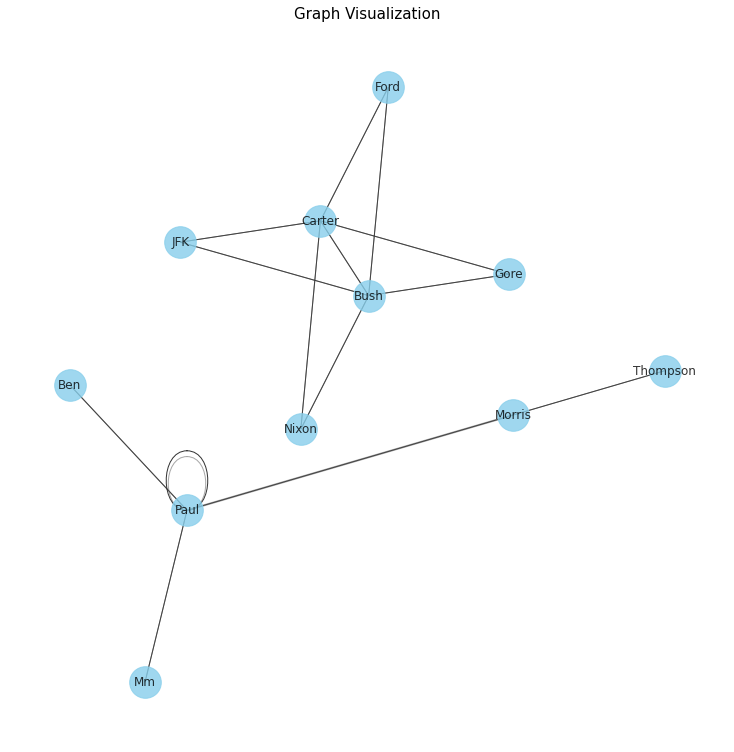

In [41]:
# Print knowledge graph of the entities (persons) linked together in text
graph = nx.from_pandas_edgelist(
           co_character[['person1', 'person2', 'weight']],
           source='person1', target='person2', edge_attr=True)

pos = nx.kamada_kawai_layout(graph, weight='weight')

_ = plt.figure(figsize=(10, 10))
nx.draw(graph, pos, 
        node_size=1000, 
        node_color='skyblue',
        alpha=0.8,
        with_labels=True)
plt.title('Graph Visualization', size=15)

for (node1, node2, data) in graph.edges(data=True):
    width = data['weight'] 
    _ = nx.draw_networkx_edges(graph, pos,
                               edgelist=[(node1, node2)],
                               width=width,
                               edge_color='#505050',
                               alpha=0.5)

plt.show()
plt.close()

### Summary

In the preceding section, the focus was on exploring relationships exclusively among persons (PERSON entities) in the provided subtitle data. Various types of relationships emerged, spanning from expressions of liking, such as "I like Mike!," to formal endorsements like "Senator Thompson has just endorsed Governor Morris," and discussions about work roles, as seen in "I work for Paul. Paul works for Morris." This exploration shed light on the diverse ways individuals' relationships were articulated in the subtitle data. 

Moving forward, there is potential for deeper insights by extending the analysis to different categories of entities. For instance, examining relationships between persons and geopolitical entities (GPE) using phrases like "Governor Morris of Arkansas," or exploring connections between nationality-related entities (NORP) and geopolitical entities could unveil additional layers of information. 

This project serves as an introductory exploration into the possibilities of NLP techniques for text analysis, with intentions to delve deeper into subsequent projects covering diverse NLP methodologies like text summarization, topic modeling, and text ranking.